# IMPORT LIBRARIES

In [52]:
import pandas as pd                                                   # For dataframes
import numpy as np
import matplotlib.pyplot as plt                                       # For plotting
from sklearn.model_selection import train_test_split,cross_val_score # For splitting the data for training and testing.
from sklearn.linear_model import LogisticRegression                   # For building the model with logistic regression.
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix         # For calculating the accuracy score precision score, recall score and f1 score to evaluate performance and present accuracy with confusion matrix  
from sklearn.feature_selection import RFE             # For selecting the best features using recursive feature selection     



# LOAD AND PREPARE THE DATA

In [53]:
df = pd.read_csv('data/divorce_data.csv', sep = ';')

## Seperate Data

In [54]:
y = df['Divorce']
X = df.drop('Divorce', axis = 1)

## Split Data

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state=1
)

# CREATE THE MODEL

In [56]:
model = LogisticRegression()


# Train the model

In [57]:
model.fit(X_train, y_train)

LogisticRegression()

- Look for the coefficients.

In [58]:
coef = model.coef_[0]
features = X.columns
coef_df = pd.DataFrame({'Coefficient': coef, 'Feature': features})
print(coef_df)

    Coefficient Feature
0      0.210207      Q1
1      0.223598      Q2
2      0.406881      Q3
3      0.112394      Q4
4      0.056745      Q5
5      0.166232      Q6
6      0.019887      Q7
7      0.189959      Q8
8      0.206910      Q9
9      0.098739     Q10
10     0.370816     Q11
11    -0.055500     Q12
12     0.014486     Q13
13     0.263722     Q14
14     0.062624     Q15
15     0.123457     Q16
16     0.097982     Q17
17     0.179969     Q18
18     0.093354     Q19
19     0.136540     Q20
20     0.005425     Q21
21     0.011361     Q22
22     0.012004     Q23
23     0.051405     Q24
24     0.063106     Q25
25     0.093819     Q26
26     0.080015     Q27
27     0.115846     Q28
28     0.115649     Q29
29     0.219052     Q30
30     0.057982     Q31
31     0.183082     Q32
32     0.062685     Q33
33     0.189801     Q34
34    -0.012584     Q35
35     0.127181     Q36
36     0.163731     Q37
37     0.131985     Q38
38     0.336422     Q39
39     0.452423     Q40
40     0.201418 

# MAKE PREDICTIONS

- Make predictions on test data

In [59]:
y_pred = model.predict(X_test)

- Get some of the predicted probabilities.

In [60]:
print(y_pred[:15])

[1 0 1 1 0 0 0 1 0 0 1 0 0 0 1]


# EVALUATE THE MODEL

- Calculate the precision, recall, F1 score and the confusion matrix.

In [61]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Confusion matrix:\n", cm)
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}".format(precision*100))
print("Recall: {:.2f}".format(recall*100))
print("F1 score: {:.2f}".format(f1*100))



Confusion matrix:
 [[19  0]
 [ 2 13]]
Accuracy: 94.12%
Precision: 100.00
Recall: 86.67
F1 score: 92.86


- Visualize the confusion matrix

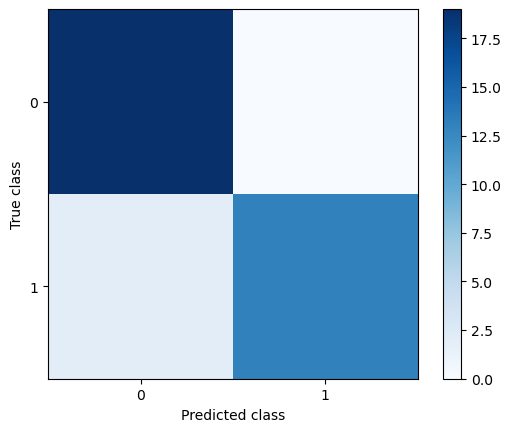

In [62]:
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks,["0","1"])
plt.yticks(tick_marks, ["0","1"])
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

- Look for the CV score of the model without making any changes in features.

In [63]:
cv_scores = cross_val_score(model, X, y, cv=5)
print(cv_scores.mean())

0.9764705882352942


# SELECT FEATURES 

## Recursive Feature Elimination

- Select the best 10 features using Recursive Feature Elimination.

In [64]:
rfe = RFE(model, n_features_to_select= 10)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[False False  True False False False False False  True False  True False
 False  True False False False  True False False False False False False
 False False False False False  True False False False False False False
 False False  True  True False False False  True False False False False
 False False False  True False False]
[ 8  4  1 22 33  6 39  3  1 20  1 35 41  1 30 17 23  1 26 11 45 44 42 36
 32 24 28 18 16  1 34  7 31 10 43 21 15 13  1  1  2 27 38  1 19 40 25 29
  5 12 37  1 14  9]


Index(['Q3', 'Q9', 'Q11', 'Q14', 'Q18', 'Q30', 'Q39', 'Q40', 'Q44', 'Q52'], dtype='object')

# UPDATE THE MODEL

- We will compare our original model and updated model.

## Seperate Data

In [65]:
y_updated = df['Divorce']
X_updated = df.loc[:,['Q3', 'Q9', 'Q11', 'Q14', 'Q18', 'Q30', 'Q39', 'Q40', 'Q44', 'Q52']]

## Split Data

In [66]:
X_train_updated, X_test_updated, y_train_updated, y_test_updated = train_test_split(
    X_updated,
    y_updated,
    test_size = 0.2,
    random_state=1
)

- Create a new updated_model object.

In [67]:
updated_model = LogisticRegression()



## Train Updated Model

In [68]:
updated_model.fit(X_train_updated, y_train_updated)


LogisticRegression()

- Look for the coefficients.

In [69]:
coef_updated = updated_model.coef_[0]
features_updated = X_updated.columns
coef_updated_df = pd.DataFrame({'Coefficient': coef_updated, 'Feature': features_updated})
print(coef_updated_df)

   Coefficient Feature
0     0.630061      Q3
1     0.445217      Q9
2     0.601313     Q11
3     0.388069     Q14
4     0.382466     Q18
5     0.426036     Q30
6     0.524203     Q39
7     0.709149     Q40
8     0.500015     Q44
9     0.350486     Q52


## Make Predictions 

- Make predictions on test data.

In [70]:
y_pred_updated = updated_model.predict(X_test_updated)

- Get some predicted probabilities.

In [71]:
print(y_pred_updated[:15])

[1 0 1 1 0 0 0 1 0 0 1 0 0 0 1]


## Evaluate the updated model

- Calculate the precision, recall, F1 score and the confusion matrix.

In [72]:
cm_updated = confusion_matrix(y_test_updated,y_pred_updated)
accuracy_updated = accuracy_score(y_test_updated,y_pred_updated)
precision_updated = precision_score(y_test_updated, y_pred_updated)
recall_updated = recall_score(y_test_updated,y_pred_updated)
f1_updated = f1_score(y_test_updated,y_pred_updated)

print("Confusion matrix:\n", cm_updated)
print("Accuracy: {:.2f}%".format(accuracy_updated*100))
print("Precision: {:.2f}".format(precision_updated*100))
print("Recall: {:.2f}".format(recall_updated*100))
print("F1 score: {:.2f}".format(f1_updated*100))

Confusion matrix:
 [[19  0]
 [ 2 13]]
Accuracy: 94.12%
Precision: 100.00
Recall: 86.67
F1 score: 92.86


- Visualize the confusion matrix

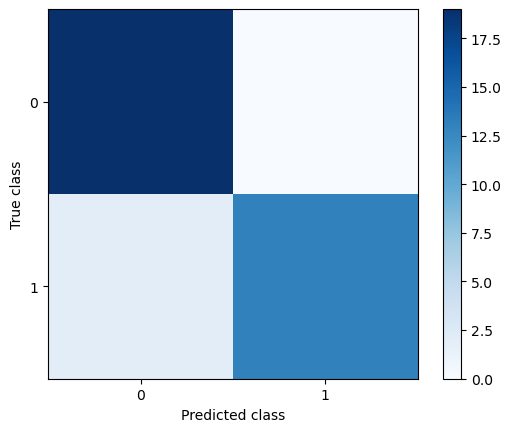

In [73]:
plt.imshow(cm_updated, interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks,["0","1"])
plt.yticks(tick_marks, ["0","1"])
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

- Look for the CV score of the model without making any changes in features.

In [74]:
cv_scores_updated = cross_val_score(updated_model, X_updated, y_updated, cv=5)
print(cv_scores_updated.mean())

0.9823529411764707
